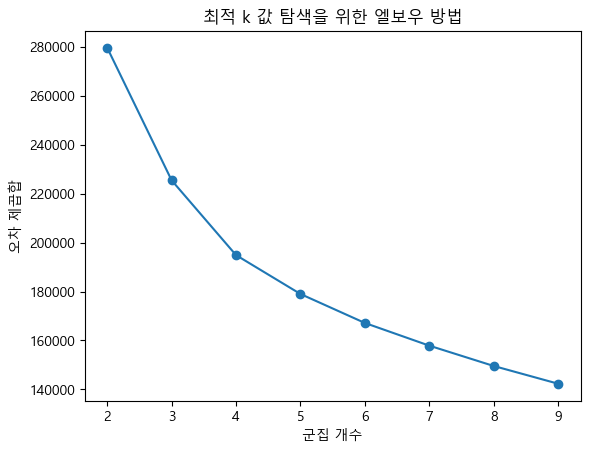

Cluster
2    15613
0    14817
1    12146
3     2626
Name: count, dtype: int64


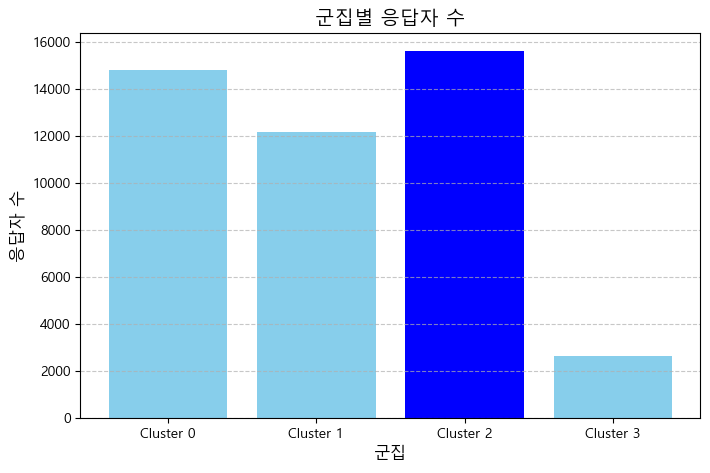

In [2]:
# 데이터 전처리 → 최적 군집 개수 찾기 → K-means 군집화 → 군집별 특성 분석
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 파일 경로
file_may = "VR기기 보유자 특성 및 이용 빈도_5월.csv"
file_nov = "VR기기 보유자 특성 및 이용 빈도_11월.csv"

# 데이터 불러오기
df_may = pd.read_csv(file_may)
df_nov = pd.read_csv(file_nov)

# 데이터 병합 (중복 RESPOND_ID 제거)
df_combined = pd.concat([df_may, df_nov]).drop_duplicates(subset=['RESPOND_ID'])

# 데이터 전처리
# 사용하지 않을 컬럼 제거
df_cluster = df_combined.drop(columns=["RESPOND_ID", "EXAMIN_BEGIN_DE"])

# 결측값 처리 (VR 이용 빈도 결측값을 "0"으로 대체)
df_cluster["VR_MCHN_UTILIIZA_FQ_VALUE"] = df_cluster["VR_MCHN_UTILIIZA_FQ_VALUE"].fillna("0")

# 범주형 변수를 수치형으로 변환 (Label Encoding)
label_encoders = {}
for col in df_cluster.columns:
    if df_cluster[col].dtype == "object":
        le = LabelEncoder()
        df_cluster[col] = le.fit_transform(df_cluster[col])
        label_encoders[col] = le

# 데이터 정규화 (StandardScaler 사용)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# 최적의 군집 개수 찾기 (Elbow Method)
inertia = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)


# Elbow Method 시각화
plt.plot(k_range, inertia, marker='o')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.xlabel('군집 개수')
plt.ylabel('오차 제곱합')
plt.title('최적 k 값 탐색을 위한 엘보우 방법')
plt.show()

# 최적 군집 개수(k) 결정 (예시로 4개로 설정)
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_scaled)

# 군집 결과를 원본 데이터에 추가
df_combined['Cluster'] = clusters

# 군집별 데이터 크기 확인
cluster_counts = df_combined['Cluster'].value_counts()
print(cluster_counts)

# 시각화: 군집별 응답자 수 분포 (막대 그래프)
plt.figure(figsize=(8, 5))
plt.bar(cluster_counts.index, cluster_counts.values, color=['blue', 'skyblue', 'skyblue', 'skyblue'])
plt.xlabel('군집', fontsize=12)
plt.ylabel('응답자 수', fontsize=12)
plt.title('군집별 응답자 수', fontsize=14)
plt.xticks(cluster_counts.index, labels=[f'Cluster {int(c)}' for c in cluster_counts.index])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()